In [128]:
import pickle
import os
from tqdm import tqdm
import numpy as np

directory = 'data/train'

length_list = []
valence_values=[]

recordings = []

for filename in tqdm(os.listdir(directory)):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            if data['valence'] != 2.333 and len(data['audio_data']) < 91000:
                length_list.append(len(data['audio_data']))
                valence_values.append(data['valence'])
                recordings.append(data['audio_data'])

valence_values = np.array(valence_values)
len(recordings)

100%|██████████| 10557/10557 [00:53<00:00, 198.68it/s]


10391

In [131]:
# Calculate the maximum length
max_length = max(length_list)

# Adjust the recordings to have the same length
adjusted_recordings = []
for recording in recordings:
    # Repeat the array until it reaches or exceeds the maximum length
    repeated_recording = np.tile(recording, (max_length // len(recording) + 1))[:max_length]
    adjusted_recordings.append(repeated_recording)

valence_values = np.array(valence_values)
len(adjusted_recordings), adjusted_recordings[0].shape


for i in adjusted_recordings:
    print(i.shape)

(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(

In [132]:
def round_to_nearest_quarter(number):
    # Assuming 'number' could be a numpy array with a single value
    if isinstance(number, np.ndarray) and number.size == 1:
        number = number.item()  # Convert single-item array to scalar
    
    # Ensure the number is within the 1 to 5 range before processing
    number = np.clip(number, 1, 5)
    # Scale number to shift quarters to whole numbers, round, and rescale
    rounded_number = np.round(number * 4) / 4
    # Clip again to ensure no out-of-range values after rounding
    rounded_number = np.clip(rounded_number, 1, 5)
    return str(rounded_number)

# Pre-process data

In [134]:
import torch
from torch.utils.data import TensorDataset, DataLoader


from sklearn.model_selection import train_test_split




############################################################################################################
# Pad the recordings to have the same length
max_length = max(len(array) for array in recordings)  # Find the maximum length

# # Pad each array to have the maximum length
# padded_arrays = np.array([np.pad(array, (0, max_length - len(array)), mode='constant') for array in recordings])


############################################################################################################
# Split the data and labels into training and testing sets
X_train, X_test_help, y_train, y_test_help = train_test_split(adjusted_recordings, valence_values, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test_help, y_test_help, test_size=0.5, random_state=42)



############################################################################################################
# Create a DataLoader for the training set, test set, and validation set

batch_size = 256  # You can adjust the batch size depending on your system's capability

# Convert input data and labels to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Use float32 for labels

# Create a dataset from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

############################################################################################################
# Repeat the same process for the test set

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



############################################################################################################
# Repeat the same process for the validation set
X_validation_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_validation_tensor = torch.tensor(y_val, dtype=torch.float32)

validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)




C:\Users\20211445\AppData\Local\Temp\ipykernel_6968\315125929.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features


In [135]:
train_loader.dataset.tensors[0].shape, train_loader.dataset.tensors[1].shape

(torch.Size([6234, 1, 90948]), torch.Size([6234]))

In [177]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torchaudio.transforms as transforms


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()



        # Set random seed for reproducibility
        torch.manual_seed(42)


        self.mfcc_transform = transforms.MFCC(
            sample_rate=44100,      ## 44.1 kHz
            n_mfcc=40              ## Created channels
        )

        self.layers = nn.ModuleList()
        
        self.layers.append(nn.BatchNorm1d(40))
        conv1 = nn.Conv1d(in_channels=40, out_channels=20, kernel_size=10, padding=1)
        nn.init.kaiming_normal_(conv1.weight, nonlinearity='relu')
        self.layers.append(conv1)
        self.layers.append(nn.BatchNorm1d(20))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=2))
        self.layers.append(nn.Dropout(0.25))

        conv2 = nn.Conv1d(in_channels=20, out_channels=20, kernel_size=10, padding=1)
        nn.init.kaiming_normal_(conv2.weight, nonlinearity='relu')
        self.layers.append(conv2)
        self.layers.append(nn.BatchNorm1d(20))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=2))
       
        conv3 = nn.Conv1d(in_channels=20, out_channels=10, kernel_size=10, padding=1)
        nn.init.kaiming_normal_(conv3.weight, nonlinearity='relu')
        self.layers.append(conv3)
        self.layers.append(nn.BatchNorm1d(10))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=2))
        self.layers.append(nn.Dropout(0.25))

        self.layers.append(nn.Flatten())

        linear1= nn.Linear(500,256)
        nn.init.kaiming_normal_(linear1.weight, nonlinearity='relu')
        self.layers.append(linear1)
        self.layers.append(nn.ReLU())
        
        linear2 = nn.Linear(256, 1)
        nn.init.kaiming_normal_(linear2.weight, nonlinearity='relu')
        self.layers.append(linear2)


    
    def forward(self, x):
        x = self.mfcc_transform(x)
        x = x.squeeze(1)
        for layer in self.layers:
            x = layer(x)
            #print(x.shape)
        return x.view(-1)


### CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Training Cycle

def train_model(MLP_model, optimizer, num_epochs):
        criterion = nn.MSELoss()
        #criterion = nn.L1Loss()
        # Training loop
        for epoch in tqdm(range(num_epochs)):
            total_loss = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
                outputs = MLP_model(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute the loss
                loss.backward()  # Backward pass

                optimizer.step()

                # Store the loss. loss.item() gets the value in a tensor. This only works for scalars.
                total_loss += loss.item()
        
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')
            if epoch > 1:
                print(evaluate_model(MLP_model, validation_loader,conf=False))
            print('--------------------------------------------------')
        print(evaluate_model(MLP_model, train_loader,conf=True))


def evaluate_model(MLP_model, test_loader,conf=False):
    with torch.no_grad():
        ### Calculate MSE 
        predictions = []
        actuals = []
        actuals_for_cm = []
        rounded_predictions = []
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = MLP_model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
            actuals_for_cm.extend([str(label) for label in labels.cpu().numpy()])
            rounded_predictions.extend([str(round_to_nearest_quarter(output)) for output in outputs.cpu().numpy()])

        predictions = np.array(predictions)
        actuals = np.array(actuals)
        mse = np.mean((predictions - actuals) ** 2)
        mae = np.mean(np.abs(predictions - actuals))
        print(f'Mean Squared Error: {mse:.4f} and Mean Absolute Error: {mae:.4f}')

        # for i in range(10):
        #     print(f"Predictions: {predictions[i]}")
        #     print(f"Actuals: {actuals[i]}")
        #     print(f"Rounded Predictions: {rounded_predictions[i]}")
        
        ##################
        # Confusion Matrix
        ##################
        if conf:
            ### Confusion Matrix
            cm = confusion_matrix(actuals_for_cm, rounded_predictions)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(actuals), yticklabels=np.unique(actuals))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()
            ### Accuracy
            accuracy = np.trace(cm) / np.sum(cm)
            print(f'Accuracy: {accuracy:.4f}')
            
        

        


c:\Users\20211445\OneDrive - TU Eindhoven\Desktop\University\Y3Q4\Deep Learning\DL_ASSIGNMENT\.venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:04<03:29,  4.27s/it]

Epoch [1/50], Loss: 3.3447
--------------------------------------------------


  4%|▍         | 2/50 [00:08<03:15,  4.08s/it]

Epoch [2/50], Loss: 1.1579
--------------------------------------------------
Epoch [3/50], Loss: 0.9390


  6%|▌         | 3/50 [00:13<03:32,  4.52s/it]

Mean Squared Error: 0.8442 and Mean Absolute Error: 0.7437
None
--------------------------------------------------
Epoch [4/50], Loss: 0.8620


  8%|▊         | 4/50 [00:18<03:38,  4.74s/it]

Mean Squared Error: 0.7739 and Mean Absolute Error: 0.7118
None
--------------------------------------------------
Epoch [5/50], Loss: 0.7648


 10%|█         | 5/50 [00:23<03:38,  4.86s/it]

Mean Squared Error: 0.8896 and Mean Absolute Error: 0.7491
None
--------------------------------------------------
Epoch [6/50], Loss: 0.7198


 12%|█▏        | 6/50 [00:28<03:35,  4.90s/it]

Mean Squared Error: 0.7157 and Mean Absolute Error: 0.6892
None
--------------------------------------------------
Epoch [7/50], Loss: 0.7093


 14%|█▍        | 7/50 [00:33<03:31,  4.93s/it]

Mean Squared Error: 0.7337 and Mean Absolute Error: 0.6987
None
--------------------------------------------------
Epoch [8/50], Loss: 0.6596


 16%|█▌        | 8/50 [00:38<03:27,  4.95s/it]

Mean Squared Error: 0.6738 and Mean Absolute Error: 0.6589
None
--------------------------------------------------
Epoch [9/50], Loss: 0.6502


 18%|█▊        | 9/50 [00:43<03:23,  4.97s/it]

Mean Squared Error: 0.7171 and Mean Absolute Error: 0.6727
None
--------------------------------------------------
Epoch [10/50], Loss: 0.6319


 20%|██        | 10/50 [00:48<03:20,  5.01s/it]

Mean Squared Error: 0.6405 and Mean Absolute Error: 0.6461
None
--------------------------------------------------
Epoch [11/50], Loss: 0.5971


 22%|██▏       | 11/50 [00:53<03:17,  5.07s/it]

Mean Squared Error: 0.6597 and Mean Absolute Error: 0.6634
None
--------------------------------------------------
Epoch [12/50], Loss: 0.6099


 24%|██▍       | 12/50 [00:58<03:11,  5.03s/it]

Mean Squared Error: 0.6312 and Mean Absolute Error: 0.6484
None
--------------------------------------------------
Epoch [13/50], Loss: 0.5839


 26%|██▌       | 13/50 [01:03<03:06,  5.03s/it]

Mean Squared Error: 0.6119 and Mean Absolute Error: 0.6332
None
--------------------------------------------------
Epoch [14/50], Loss: 0.5587


 28%|██▊       | 14/50 [01:08<02:59,  4.99s/it]

Mean Squared Error: 0.6133 and Mean Absolute Error: 0.6282
None
--------------------------------------------------
Epoch [15/50], Loss: 0.5850


 30%|███       | 15/50 [01:13<02:54,  5.00s/it]

Mean Squared Error: 0.6175 and Mean Absolute Error: 0.6327
None
--------------------------------------------------
Epoch [16/50], Loss: 0.5602


 32%|███▏      | 16/50 [01:18<02:53,  5.11s/it]

Mean Squared Error: 0.5816 and Mean Absolute Error: 0.6191
None
--------------------------------------------------
Epoch [17/50], Loss: 0.5437


 34%|███▍      | 17/50 [01:24<02:53,  5.24s/it]

Mean Squared Error: 0.5825 and Mean Absolute Error: 0.6242
None
--------------------------------------------------
Epoch [18/50], Loss: 0.5588


 36%|███▌      | 18/50 [01:29<02:45,  5.18s/it]

Mean Squared Error: 0.5775 and Mean Absolute Error: 0.6205
None
--------------------------------------------------
Epoch [19/50], Loss: 0.5516


 38%|███▊      | 19/50 [01:34<02:38,  5.11s/it]

Mean Squared Error: 0.5708 and Mean Absolute Error: 0.6156
None
--------------------------------------------------
Epoch [20/50], Loss: 0.5277


 40%|████      | 20/50 [01:39<02:31,  5.06s/it]

Mean Squared Error: 0.5668 and Mean Absolute Error: 0.6092
None
--------------------------------------------------
Epoch [21/50], Loss: 0.5324


 42%|████▏     | 21/50 [01:44<02:25,  5.03s/it]

Mean Squared Error: 0.5863 and Mean Absolute Error: 0.6135
None
--------------------------------------------------
Epoch [22/50], Loss: 0.5303


 44%|████▍     | 22/50 [01:49<02:19,  4.99s/it]

Mean Squared Error: 0.5723 and Mean Absolute Error: 0.6112
None
--------------------------------------------------
Epoch [23/50], Loss: 0.5165


 46%|████▌     | 23/50 [01:54<02:14,  4.99s/it]

Mean Squared Error: 0.5565 and Mean Absolute Error: 0.6070
None
--------------------------------------------------
Epoch [24/50], Loss: 0.5078


 48%|████▊     | 24/50 [01:59<02:09,  4.97s/it]

Mean Squared Error: 0.5587 and Mean Absolute Error: 0.6093
None
--------------------------------------------------
Epoch [25/50], Loss: 0.5181


 50%|█████     | 25/50 [02:04<02:10,  5.21s/it]

Mean Squared Error: 0.5600 and Mean Absolute Error: 0.6131
None
--------------------------------------------------
Epoch [26/50], Loss: 0.5169


 52%|█████▏    | 26/50 [02:10<02:07,  5.30s/it]

Mean Squared Error: 0.5626 and Mean Absolute Error: 0.6123
None
--------------------------------------------------
Epoch [27/50], Loss: 0.5085


 54%|█████▍    | 27/50 [02:15<02:01,  5.28s/it]

Mean Squared Error: 0.5450 and Mean Absolute Error: 0.6003
None
--------------------------------------------------
Epoch [28/50], Loss: 0.5022


 56%|█████▌    | 28/50 [02:20<01:55,  5.24s/it]

Mean Squared Error: 0.5464 and Mean Absolute Error: 0.5994
None
--------------------------------------------------
Epoch [29/50], Loss: 0.5002


 58%|█████▊    | 29/50 [02:26<01:50,  5.24s/it]

Mean Squared Error: 0.5380 and Mean Absolute Error: 0.5956
None
--------------------------------------------------
Epoch [30/50], Loss: 0.4988


 60%|██████    | 30/50 [02:31<01:43,  5.19s/it]

Mean Squared Error: 0.5465 and Mean Absolute Error: 0.5993
None
--------------------------------------------------
Epoch [31/50], Loss: 0.4999


 62%|██████▏   | 31/50 [02:36<01:37,  5.14s/it]

Mean Squared Error: 0.5411 and Mean Absolute Error: 0.5971
None
--------------------------------------------------
Epoch [32/50], Loss: 0.4885


 64%|██████▍   | 32/50 [02:41<01:31,  5.09s/it]

Mean Squared Error: 0.5361 and Mean Absolute Error: 0.5954
None
--------------------------------------------------
Epoch [33/50], Loss: 0.4895


 66%|██████▌   | 33/50 [02:46<01:26,  5.09s/it]

Mean Squared Error: 0.5438 and Mean Absolute Error: 0.6019
None
--------------------------------------------------
Epoch [34/50], Loss: 0.4866


 68%|██████▊   | 34/50 [02:51<01:21,  5.08s/it]

Mean Squared Error: 0.5482 and Mean Absolute Error: 0.6036
None
--------------------------------------------------
Epoch [35/50], Loss: 0.4929


 70%|███████   | 35/50 [02:56<01:16,  5.07s/it]

Mean Squared Error: 0.5383 and Mean Absolute Error: 0.6012
None
--------------------------------------------------
Epoch [36/50], Loss: 0.4825


 72%|███████▏  | 36/50 [03:01<01:10,  5.04s/it]

Mean Squared Error: 0.5307 and Mean Absolute Error: 0.5979
None
--------------------------------------------------
Epoch [37/50], Loss: 0.4766


 74%|███████▍  | 37/50 [03:06<01:05,  5.04s/it]

Mean Squared Error: 0.5281 and Mean Absolute Error: 0.5915
None
--------------------------------------------------
Epoch [38/50], Loss: 0.4787


 76%|███████▌  | 38/50 [03:11<01:00,  5.01s/it]

Mean Squared Error: 0.5361 and Mean Absolute Error: 0.5957
None
--------------------------------------------------
Epoch [39/50], Loss: 0.4750


 78%|███████▊  | 39/50 [03:16<00:55,  5.00s/it]

Mean Squared Error: 0.5399 and Mean Absolute Error: 0.5969
None
--------------------------------------------------
Epoch [40/50], Loss: 0.4735


 80%|████████  | 40/50 [03:21<00:50,  5.02s/it]

Mean Squared Error: 0.5202 and Mean Absolute Error: 0.5851
None
--------------------------------------------------
Epoch [41/50], Loss: 0.4696


 82%|████████▏ | 41/50 [03:26<00:45,  5.01s/it]

Mean Squared Error: 0.5111 and Mean Absolute Error: 0.5767
None
--------------------------------------------------
Epoch [42/50], Loss: 0.4710


 84%|████████▍ | 42/50 [03:31<00:40,  5.04s/it]

Mean Squared Error: 0.5188 and Mean Absolute Error: 0.5859
None
--------------------------------------------------
Epoch [43/50], Loss: 0.4702


 86%|████████▌ | 43/50 [03:36<00:35,  5.06s/it]

Mean Squared Error: 0.5287 and Mean Absolute Error: 0.5900
None
--------------------------------------------------
Epoch [44/50], Loss: 0.4631


 88%|████████▊ | 44/50 [03:41<00:30,  5.03s/it]

Mean Squared Error: 0.5169 and Mean Absolute Error: 0.5875
None
--------------------------------------------------
Epoch [45/50], Loss: 0.4704


 90%|█████████ | 45/50 [03:46<00:25,  5.02s/it]

Mean Squared Error: 0.5231 and Mean Absolute Error: 0.5921
None
--------------------------------------------------
Epoch [46/50], Loss: 0.4569


 92%|█████████▏| 46/50 [03:51<00:20,  5.00s/it]

Mean Squared Error: 0.5159 and Mean Absolute Error: 0.5832
None
--------------------------------------------------
Epoch [47/50], Loss: 0.4525


 94%|█████████▍| 47/50 [03:56<00:15,  5.03s/it]

Mean Squared Error: 0.5063 and Mean Absolute Error: 0.5768
None
--------------------------------------------------
Epoch [48/50], Loss: 0.4563


 96%|█████████▌| 48/50 [04:01<00:09,  5.00s/it]

Mean Squared Error: 0.5182 and Mean Absolute Error: 0.5798
None
--------------------------------------------------
Epoch [49/50], Loss: 0.4656


 98%|█████████▊| 49/50 [04:06<00:04,  4.99s/it]

Mean Squared Error: 0.5191 and Mean Absolute Error: 0.5828
None
--------------------------------------------------
Epoch [50/50], Loss: 0.4566


100%|██████████| 50/50 [04:11<00:00,  5.03s/it]

Mean Squared Error: 0.5181 and Mean Absolute Error: 0.5836
None
--------------------------------------------------


Mean Squared Error: 0.4547 and Mean Absolute Error: 0.5412


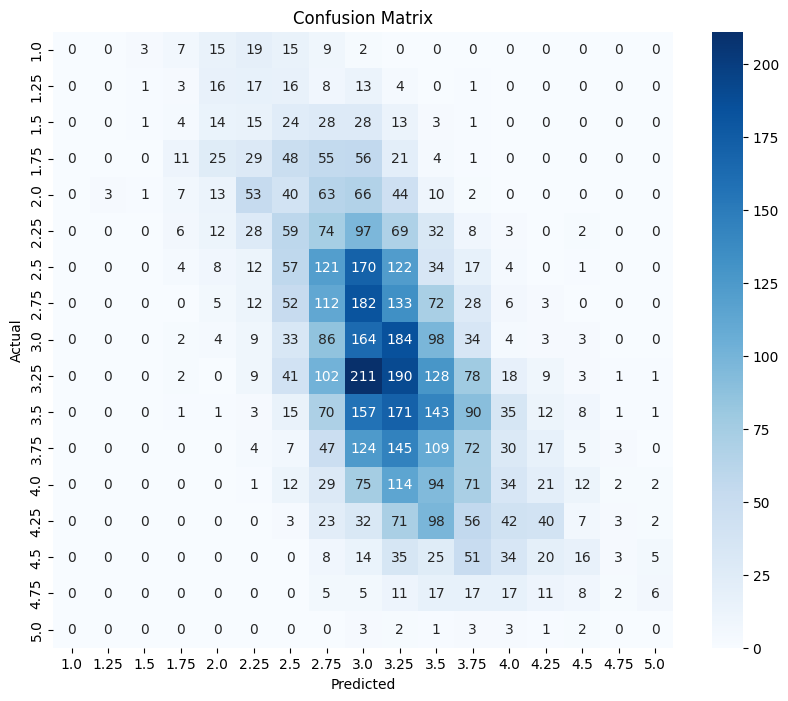

Accuracy: 0.1416
None


In [179]:
modelCNN = CNN().to(device)
optimizer = optim.Adagrad(modelCNN.parameters(), lr=0.001, weight_decay=0.0001)
train_model(modelCNN, optimizer, num_epochs=50)

Mean Squared Error: 0.5072 and Mean Absolute Error: 0.5744


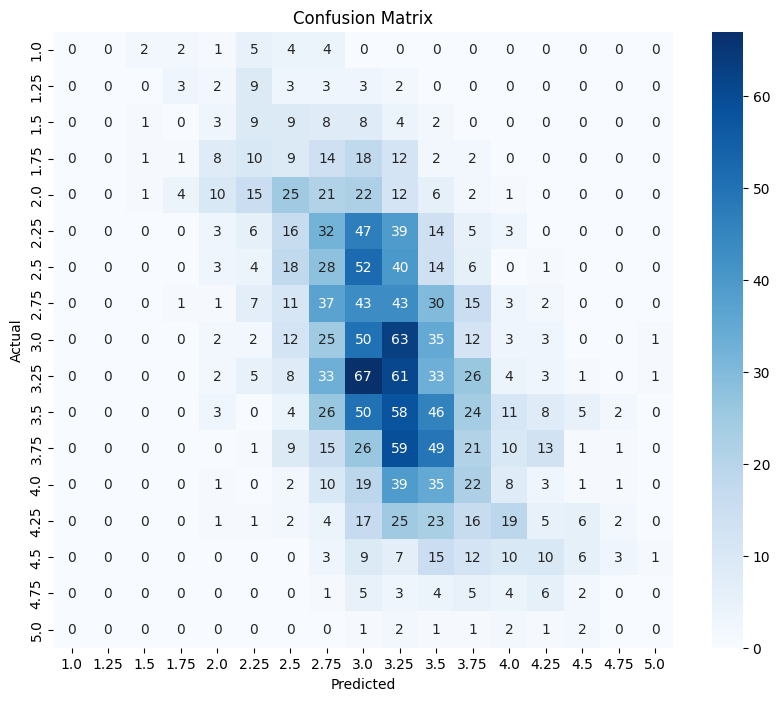

Accuracy: 0.1299


In [180]:
evaluate_model(modelCNN, test_loader,conf=True)

Mean Squared Error: 0.4162 and Mean Absolute Error: 0.5158


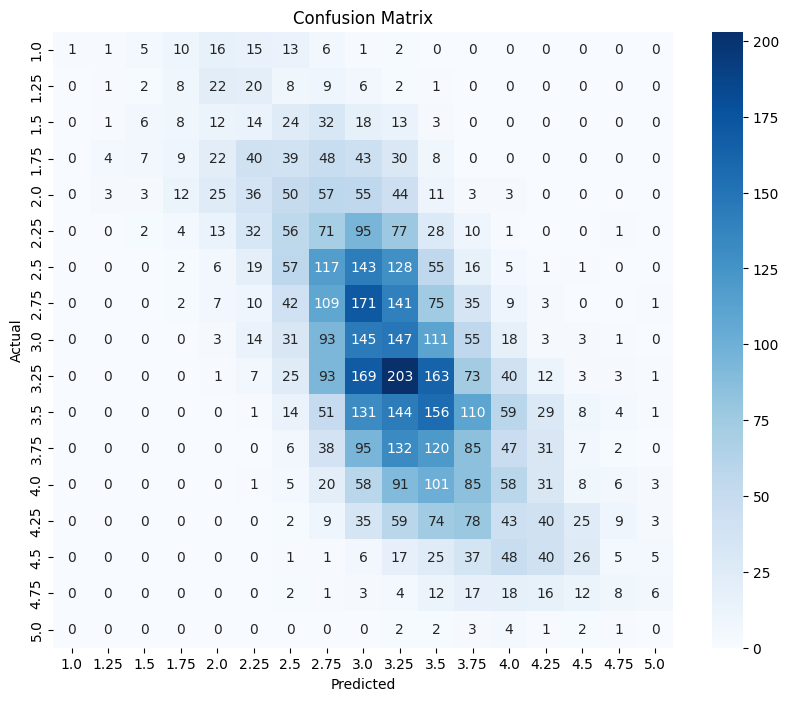

Accuracy: 0.1542


In [168]:
evaluate_model(modelCNN, train_loader,conf=True)